## Principal Component Analysis (PCA) in Python

### Introduction

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

#### But where all you can apply PCA?

1. Data Visualization: When working on any data related problem, the challenge in today's world is the sheer volume of data, and the variables/features that define that data. To solve a problem where data is the key, you need extensive data exploration like finding out how the variables are correlated or understanding the distribution of a few variables. Considering that there are a large number of variables or dimensions along which the data is distributed, visualization can be a challenge and almost impossible.Hence, PCA can do that for you since it projects the data into a lower dimension, thereby allowing you to visualize the data in a 2D or 3D space with a naked eye.


2. Speeding Machine Learning (ML) Algorithm: Since PCA's main idea is dimensionality reduction, you can leverage that to speed up your machine learning algorithm's training and testing time considering your data has a lot of features, and the ML algorithm's learning is too slow.

#### What is a Principal Component?

Principal components are the key to PCA; they represent what's underneath the hood of your data. In a layman term, when the data is projected into a lower dimension (assume three dimensions) from a higher space, the three dimensions are nothing but the three Principal Components that captures (or holds) most of the variance (information) of your data.

Principal components have both direction and magnitude. The direction represents across which principal axes the data is mostly spread out or has most variance and the magnitude signifies the amount of variance that Principal Component captures of the data when projected onto that axis. The principal components are a straight line, and the first principal component holds the most variance in the data. Each subsequent principal component is orthogonal to the last and has a lesser variance. In this way, given a set of x correlated variables over y samples you achieve a set of u uncorrelated principal components over the same y samples.

The reason you achieve uncorrelated principal components from the original features is that the correlated features contribute to the same principal component, thereby reducing the original data features into uncorrelated principal components; each representing a different set of correlated features with different amounts of variation.

Each principal component represents a percentage of total variation captured from the data.

### Breast Cancer Data Exploration

Let's first explore the Breast Cancer dataset.

In [23]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [46]:
breast_dataset = pd.read_csv('breast_dataset.csv')

In [3]:
breast_dataset.tail(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,Malignant
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,Malignant
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,Malignant
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,Benign
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,Benign
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,Malignant


### Data Visualization using PCA

It is a common practice to normalize your data before feeding it to any machine learning algorithm.

To apply normalization, you will import StandardScaler module from the sklearn library and select only the features from the breast_dataset you created in the Data Exploration step. Once you have the features, you will then apply scaling by doing fit_transform on the feature data.

While applying StandardScaler, each feature of your data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.

In [8]:
breast_dataset.shape

(569, 31)

In [49]:
## to do (use standardscaler to scale the dataset, note you only need to do PCA on the first 30 columns, you can exclude labe column for now)
from sklearn.preprocessing import StandardScaler
cols = [i for i in breast_dataset.columns if i not in ['label']]
breast_dataset1=breast_dataset[cols]
breast_dataset = StandardScaler().fit_transform(breast_dataset1.values)


In [30]:
breast_dataset = pd.DataFrame(breast_dataset)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


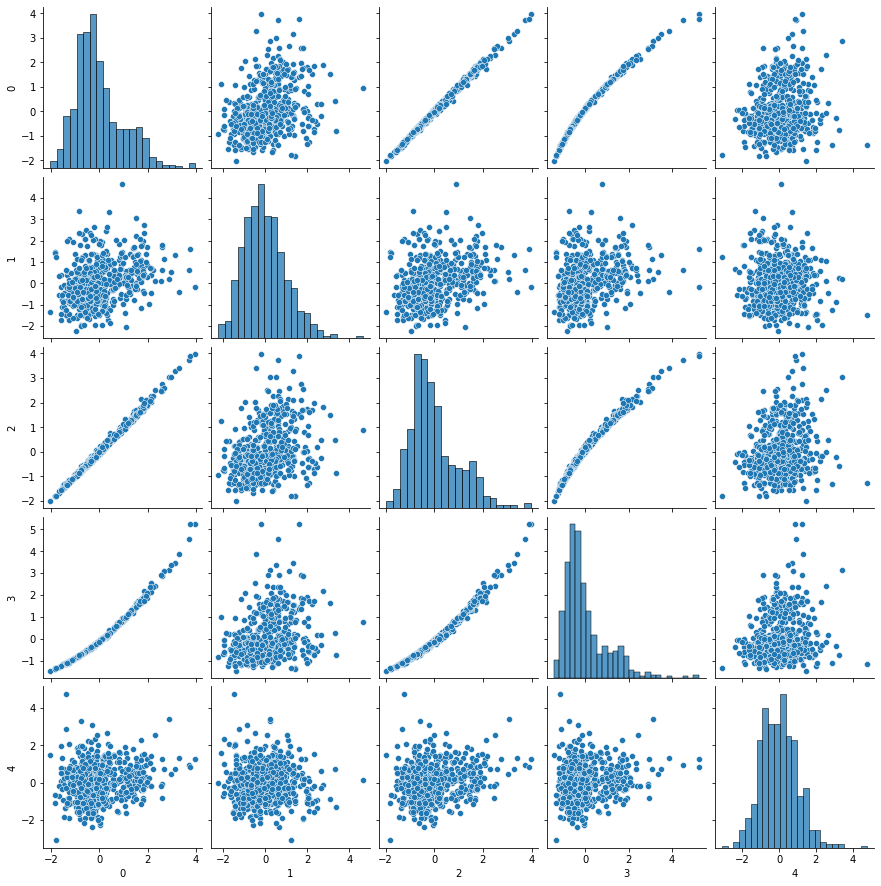

In [29]:
sns.pairplot(breast_dataset.iloc[:,range(5)])

Now comes the critical part, the next few lines of code will be projecting the thirty-dimensional Breast Cancer data to two-dimensional principal components.

You will use the sklearn library to import the PCA module, and in the PCA method, you will pass the number of components (n_components=2) and finally call fit_transform on the aggregate data. Here, several components represent the lower dimension in which you will project your higher dimension data.

In [33]:
## to do PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_breast_dataset=pca.fit_transform(breast_dataset)
new_breast_dataset.shape

(569, 2)

Next, let's create a DataFrame that will have the first and second principal component values for all 569 samples.

In [36]:
## to do get PC1 and PC2 into principal_breast_Df
principal_breast_Df = pd.DataFrame(new_breast_dataset)
principal_breast_Df.columns = ['pc1','pc2']

In [48]:
principal_breast_Df.tail()

,pc1,pc2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


Once you have the principal components, you can find the explained_variance_ratio. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [38]:
# todo 
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

From the above output, you can observe that the principal component 1 holds 44.2% of the information while the principal component 2 holds only 19% of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.

Plot PC1 and PC2 in a two dimensional space, differentiate them using colors based on label (hint: use seaborn relplot)

In [58]:
sns.set(style="darkgrid")
x = pd.read_csv('breast_dataset.csv')
new = pd.concat([principal_breast_Df,x['label']],axis=1)
new

,pc1,pc2,label
0,9.192837,1.948583,Benign
1,2.387802,-3.768172,Benign
2,5.733896,-1.075174,Benign
3,7.122953,10.275589,Benign
4,3.935302,-1.948072,Benign
...,...,...,...
564,6.439315,-3.576817,Benign
565,3.793382,-3.584048,Benign
566,1.256179,-1.902297,Benign
567,10.374794,1.672010,Benign


From the above graph, you can observe that the two classes benign and malignant, when projected to a two-dimensional space, can be linearly separable up to some extent. Other observations can be that the benign class is spread out as compared to the malignant class.

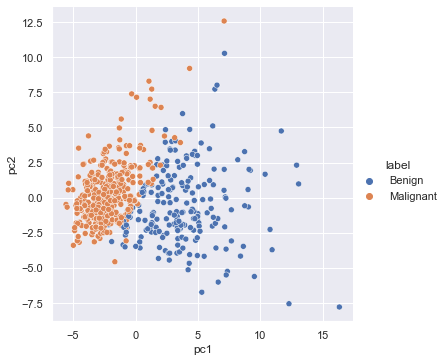

In [60]:
sns.relplot(x="pc1", y="pc2",hue="label", data=new)